In [14]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# Data Augmentation process
# ImageDataGenerator(normalizing(divide every img by 255), genrating more images )
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   vertical_flip = True,
                                   horizontal_flip = True)

In [3]:
# Training Set
# Providing training dataset to image_datagen
training_set = train_datagen.flow_from_directory(r'--------Choose your path----------\Monkey Breed Classification\training',
                                                 target_size = (224, 224), # making same image size
                                                 class_mode = 'categorical', #for 2 classes we use binary 
                                                 batch_size = 16 # 16 images will go once, for training
                                                 )

Found 1098 images belonging to 10 classes.


In [4]:
# Test Set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(r'--------Choose your path----------\Monkey Breed Classification\validation',
                                            target_size=(224, 224), class_mode='categorical', batch_size=16)

Found 272 images belonging to 10 classes.


## Make CNN

In [5]:
# Initializing the CNN
cnn = tf.keras.models.Sequential()

# Hidden Layers
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flatten Layer
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax')) # Last layer

In [6]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 100352)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               12845184  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

## Train Model

In [7]:
cnn.compile(optimizer='adam', loss='categorical_crossentropy',
            metrics=['accuracy']) # Using adam to backpropagate and optimize

history = cnn.fit(x=training_set, validation_data=test_set, epochs=10) # Fit function is used to start training the model

Epoch 1/10
69/69 [==============================] - 71s 1s/step - loss: 2.7300 - accuracy: 0.2104 - val_loss: 1.8760 - val_accuracy: 0.3051
Epoch 2/10
69/69 [==============================] - 71s 1s/step - loss: 1.7306 - accuracy: 0.3889 - val_loss: 1.6799 - val_accuracy: 0.4007
Epoch 3/10
69/69 [==============================] - 70s 1s/step - loss: 1.5398 - accuracy: 0.4390 - val_loss: 1.4364 - val_accuracy: 0.4816
Epoch 4/10
69/69 [==============================] - 70s 1s/step - loss: 1.3767 - accuracy: 0.5027 - val_loss: 1.4852 - val_accuracy: 0.4816
Epoch 5/10
69/69 [==============================] - 65s 940ms/step - loss: 1.2818 - accuracy: 0.5492 - val_loss: 1.2937 - val_accuracy: 0.5588
Epoch 6/10
69/69 [==============================] - 64s 925ms/step - loss: 1.1848 - accuracy: 0.5738 - val_loss: 1.3047 - val_accuracy: 0.5515
Epoch 7/10
69/69 [==============================] - 64s 928ms/step - loss: 1.1588 - accuracy: 0.5811 - val_loss: 1.3352 - val_accuracy: 0.5184
Epoch 8/10


In [8]:
# Save Model
history.model.save(r'--------Choose your path----------\Monkey Breed Classification\Models\model-10.h5')

In [9]:
# Load Model
model = tf.keras.models.load_model(r'--------Choose your path----------\Monkey Breed Classification\Models\model-10.h5')

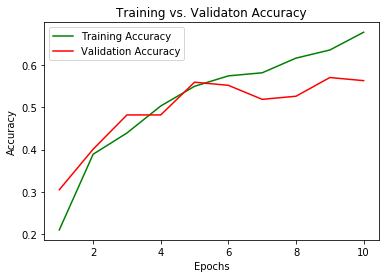

In [10]:
# plot train vs. validation accuracy
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'g', label='Training Accuracy')
plt.plot(epochs, acc_val, 'r', label='Validation Accuracy')
plt.title("Training vs. Validaton Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

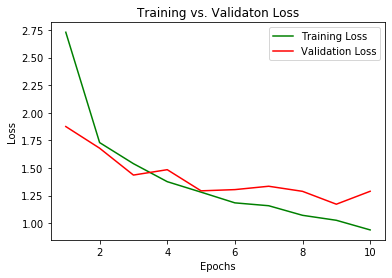

In [11]:
# plot train vs. validation loss
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training Loss')
plt.plot(epochs, loss_val, 'r', label='Validation Loss')
plt.title("Training vs. Validaton Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing

In [15]:
txt=pd.read_csv('monkey_labels.txt')

In [16]:
txt

,Label,Latin Name,Common Name,Train Images,Validation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


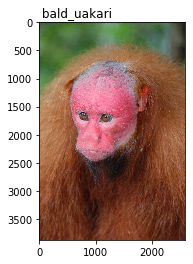

In [20]:
test_image=r'--------Choose your path----------\Monkey Breed Classification\validation\n2\n210.jpg'
open_image=Image.open(test_image)
test_image=image.load_img(test_image,target_size=(224,224))
test_image=image.img_to_array(test_image)
test_image=test_image/255
test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
result=np.argmax(result)
Name=txt.iloc[result]
Name=Name.iloc[2]
plt.imshow(open_image)
plt.title(Name)
plt.show()